# Una primera red neuronal con Keras

Tradicionalmente, y a diferencia de otros muchos modelos de Machine Learning (ML) clásicos, las aproximaciones a ML por medio de Redes Neuronales tenía ciertas connotaciones negativas a causa de la dificultad para ajustar los parámetros de los que dependían y la difícil interpretación que la optimización de estos parámetros proporcionaba para entender porqué el modelo estaba funcionando mejor o peor. Este problema no hizo más que agravarse en situaciones en las que los avances computacionales permitían aumentar el número y tamaño de las capas (y, en consecuencia, el número de parámetros del modelo resultante), llegando a considerarse más un proceso de experiencia implícita y artesania que de un modelo científico.

Sin embargo, la gran cantidad de resultados obtenidos recientemente, así como la mejora progresiva de capacidad de cómputo, ha hecho que el uso de Redes Neuronales con muchas capas (Deep Learning) se haya extendido hasta el punto de ser una de las primeras aproximaciones que mucha gente tiene hoy en día al campo del ML (e incluso de la IA en general). Pero no todo se debe únicamente a la mejora en hardware, sino también a la aparición de librerías que acercaban y facilitaban la definición, entrenamiento, e interpretación de modelos neuronales de gran envergadura. Sin duda, la aparición de librerías de bajo nivel como **TensorFlow** han sido determinantes para estos avances, y no menor ha sido la aparición de **Keras**, que a modo de capa de alto nivel ha estandarizado el uso de estas librerías de más bajo nivel.

En este notebook vamos a atacar el problema clásico del dataset Iris. Comencemos, pues, importando las librerías que necesitaremos a lo largo de este notebook: scikit-learn, Keras y algunas relacionada con representación de datos.

In [28]:
# Descomentar la siguiente línea para Colab
# %tensorflow_version 1.x

import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import to_categorical

UsageError: Line magic function `%tensorflow_version` not found.


# 1. El Dataset Iris

El famoso [Dataset Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) (publicado por Ronald Fisher en 1936) es un buen método para demostrar la API de cualquier paquete de datos, llegando a convertirse en una especie de *Hola Mundo* del machine learning.

Los datos son simples, y es posible alcanzar buenos resultados usando clasificadores muy sencillos, hasta el punto que hacer uso de ANN para resolver el mismo problema puede ser considerado como *matar moscas a cañonazos*. Sin embargo, y por las mismas razones, puede ser un excelente ejemplo para recordar algunos conceptos esenciales de ML e introducirse en las bases de Keras de una forma comparada.

Este dataset viene de fábrica en muchas librerías, nosotros haremos uso de la que proporciona **seaborn** porque viene en forma de dataframe etiquetado que se puede visualizar fácilmente:

In [2]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<div>
    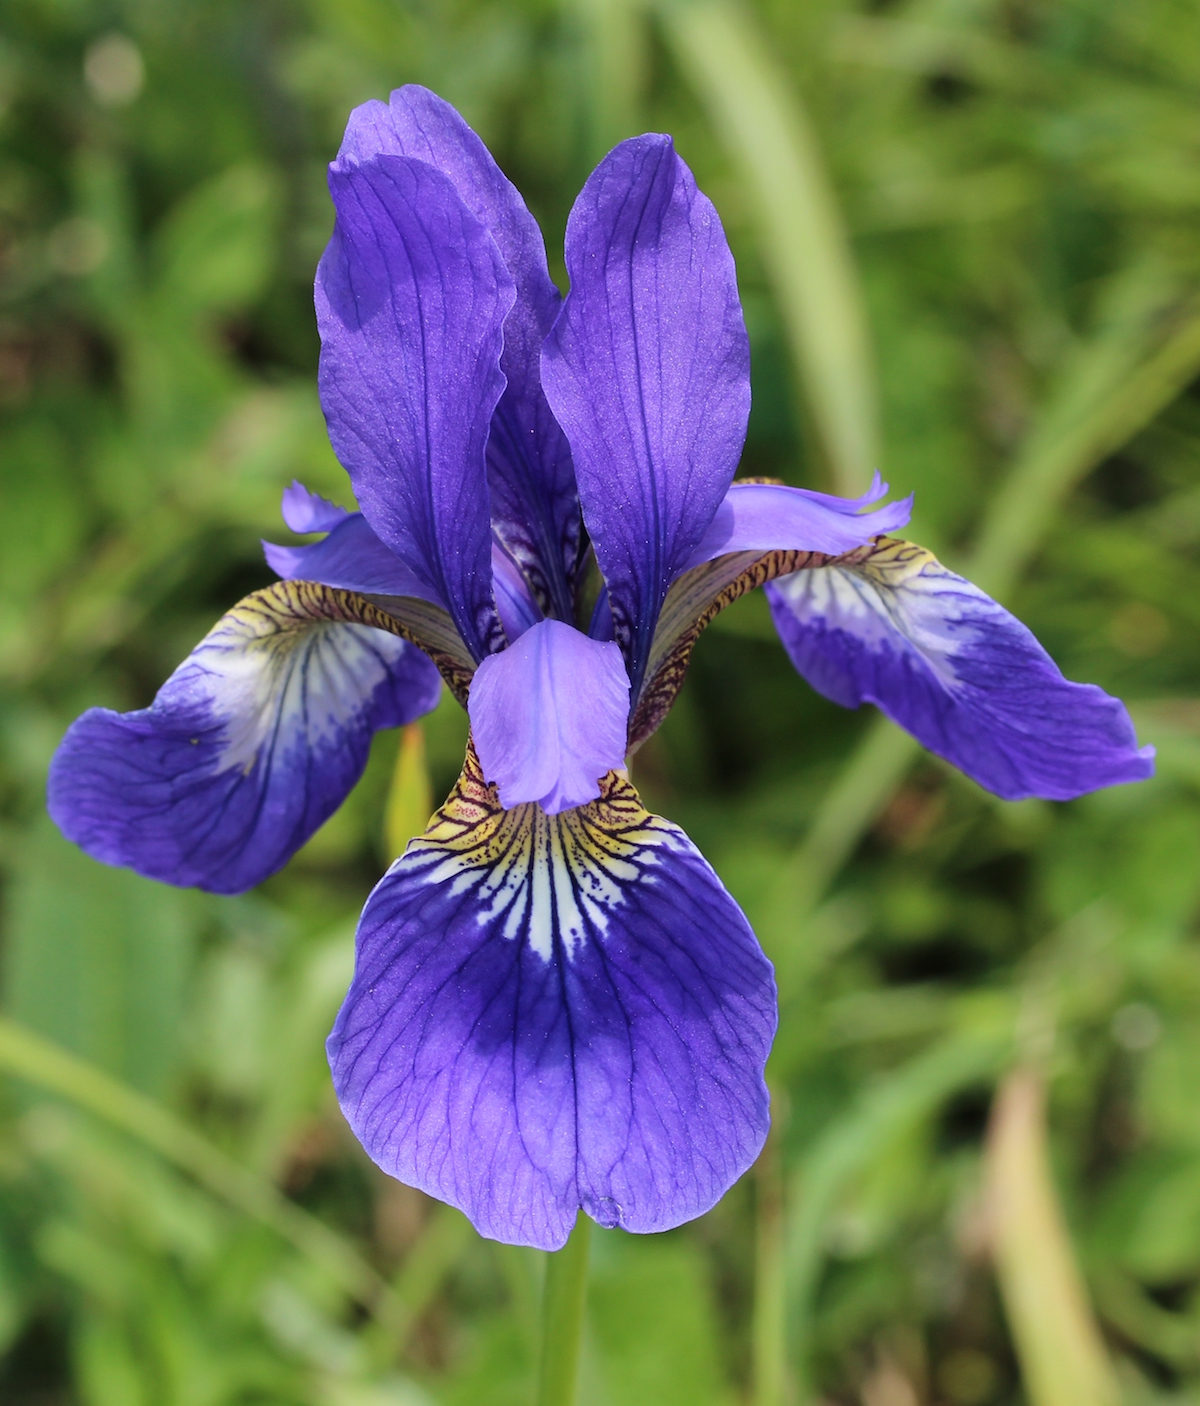
</div>

Para cada una de las muestras hay 5 unidades de datos: las 4 primeras son algunas medidas numéricas (en cm) del ejemplar que representa, y la quinta es la variedad de iris a la que pertenece. Hay 3 variedades en el dataset: **setosa**, **verscicolor** y **virginica**. El objetivo es construir un clasificador que, dadas las medidas de un ejemplar, sea capaz de predecir a qué variedad corresponde.

Es buena idea siempre comenzar por *ver* cómo son los datos de nuestro dataset para hacernos una idea de qué problemas pueden encontrarse a la hora de conseguir tal clasificador. **seaborn** proporciona algunas funciones para facilitar esta representación:

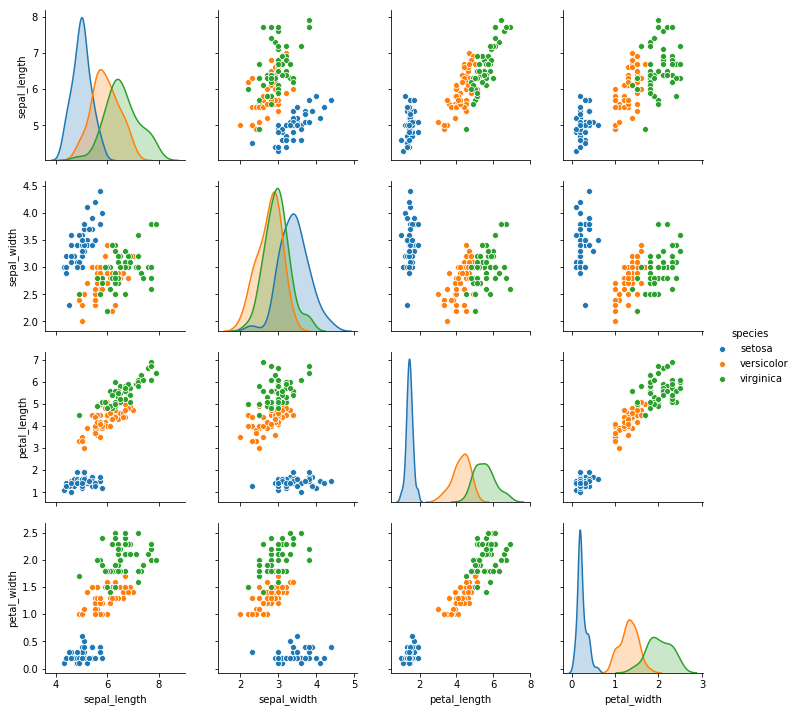

In [3]:
sns.pairplot(iris, hue='species');

# 2. Preparando los datos con SKLearn

## 2.1 Preprocesando los datos
En primer lugar tenemos que extraer los datos del dataframe proporcionado por **seaborn**. Almacenaremos por separado los 4 valores numéricos (y que se convierten en *entrada* de los posibles modelos), de la variedad de iris (y que se convierte en el objetivo, *etiqueta*, a predecir):

In [4]:
X = iris.values[:, :4]
y = iris.values[:, 4]

Como suele ser habitual en cualquier metodología de ML, el entrenamiento se hará con algunos de los datos, mientras que el resto se reserva para medir la eficiencia del modelo obtenido. Aunque este proceso es muy sencillo hacerlo a mano, **scikit-learn** proporciona una función, `train_test_split()`, para esta tarea:

In [5]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, test_size=0.5, random_state=0)

## 2.2 Entrenando un clasificador clásico con SKLearn

Ahora vamos a entrenar un clasificador por regresión logística con SKL. Hacerlo con esta librería es una línea de código. Como cualquier otro objeto de SKLearn, un clasificador `LogisticRegressionCV` tiene un método `.fit()` que se ocupa de todos los detalles de la optimización de parámetros que se ajustan mejor al conjunto de entrenamiento:

In [8]:
lr = LogisticRegressionCV()
lr.fit(train_X, train_y)

c:\users\miguel\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\miguel\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

Ya podemos medir la fracción de muestras del conjunto de test que se clasifican correctamente con el clasificador obtenido:

In [9]:
print("Accuracy = {:.2f}".format(lr.score(test_X, test_y)))

Accuracy = 0.83


# 3. Trabajando con Keras

Hemos visto que generar un clasificador con SKearnL es muy simple:
 - una línea para instanciar el clasificador
 - una línea para entrenarlo
 - y una línea para medir su rendimiento
 
Veremos que en Keras es solo un poco más complicado: La preparación de los datos cambia un poco, y como el modelo de redes es más complejo que el clasificador por regresión logística, necesitaremos un poco más de espacio para instanciarlo, pero, por lo demás, no se diferencia tanto de cómo trabaja SKLearn.

Lo primero que hemos de tener en cuenta es que los clasificadores de SKLearn aceptan cadenas como etiquetas, por ejemplo, `"setosa"`. Pero Keras necesita que todas las etiquetas sean codificadas de forma numérica, lo que significa, por ejemplo, que hemos de añadir una columna numérica a cada muestra para representar la variedad a la que pertenece de forma binaria (es lo que se llama *one-hot-encoding*):

```
setosa versicolor virginica
     1          0         0
     0          1         0
     1          0         0
     0          0         1
```

Hay muchas forma de hacer eso, por ejemplo, desde **pandas** puedes usar `pandas.get_dummies()`, y también hay una función *one-hot-encoding* en SKLearn. Vamos a ver cómo se hace usando Keras y algo de **numpy** (hay más formas).

In [21]:
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return to_categorical(ids, len(uniques))

train_y_ohe = one_hot_encode_object_array(train_y)
test_y_ohe = one_hot_encode_object_array(test_y)

## 3.1 Construyendo la red neuronal

La diferencia más significativa, por supuesto, es cómo especificar la estructura del modelo (la red neuronal) que queremos usar para el entrenamiento. En Keras los modelos son más flexibles que en Sklearn y hay que indicar el número de parámetros para determinarlo: número de capas, tamaño de las capas, tipo de conexiones entre capas, etc.

Vamos a comenzar construyendo una red muy simple. Dos de las decisiones vienen impuesta por los datos: hay 4 características y 3 clases, así que la capa de entrada debe tener 4 unidades, y la capa de salida debe tener 3 unidades. Vamos a usar una única capa oculta, y le daremos 16 unidades. Desde el punto de vista de una GPU, 16 es un número perfecto (es potencia de 2), así que prepárate para ver muchas capas con tamaños de este tipo (lo veremos en la sesión 2).

Vamos a definir el modelo completo poco a poco y de la forma más sencilla que proporciona Keras, como una pila de capas (en Keras se dice que es un **modelo secuencial**):

In [22]:
model = Sequential()

Las próximas líneas definen el tamaño de la capa de entrada (`input_shape=(4,)`), y el tamaño y función de activación que se usa en las unidades de la capa oculta:

In [23]:
model.add(Dense(16, input_shape=(4,)))
model.add(Activation('sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


... y, por último, el tamaño de la capa de salida y la función de activación que usarán sus unidades:

In [24]:
model.add(Dense(3))
model.add(Activation('softmax'))

Finalmente, basta especificar la estrategia de optimización y la función de pérdida que se intentará minimizar. Además, en esta fase también se indica qué métricas se tendrán que considerar para medir el rendimiento:

In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

## 3.2 Entrenamiento y uso del clasificador neuronal

Una vez definida la estructura y compilada, tenemos un objeto que es similar a los proporcionados por Sklearn. En particular, tiene métodos `.fit()` y `.predict()`. Comencemos por el entrenamiento (`fit`):

Entrenar una red neuronal a menudo está relacionado con el concepto de *minibatching*, que significa enseñar a la red un subconjunto del dataset completo, ajustar los pesos respecto a ese subconjunto, y entonces mostrarle otro subconjunto, repitiendo el proceso. Cuando la red haya visto todos los datos una vez se denomina **epoch** (época). Ajustar la relación de minibatch/epoch depende en gran medida del problema concreto que estamos abordando, pero en este caso vamos a usar un minibatch de 1. En este caso, el *Descenso del Gradiente clásico* es suficientemente bueno: se muestra a la red una sola flor, se ajustan los pesos para mejorar su rendimiento respecto al resultado con ella, y se pasa a la siguente.

Observa que si quieres repetir un entrenamiento, has de volver a llamar a `model.compile()` para que se reinicialicen los pesos.

In [26]:
model.fit(train_X, train_y_ohe, epochs=100, batch_size=1, verbose=0);

Instructions for updating:
Use tf.cast instead.


Cuando se hace un uso básico, la única diferencia entre la sintaxis de la API de Keras y la de Sklearn es que el método `.score()` de Sklearn se llama `.evaluate()` en Keras. 

`evaluate()` devuelve la función de pérdida y cualquier otra métrica que se compiló con el modelo. En nuestro caso, `accuracy`, que podemos comparar con la que calculamos usando el método `.score()` de Sklearn con el clasificador `LogisticRegressionCV`.

In [27]:
loss, accuracy = model.evaluate(test_X, test_y_ohe, verbose=0)
print("Accuracy = {:.2f}".format(accuracy))

Accuracy = 0.99


Como puedes comprobar, la red neuronal devuelve mejores resultados que el clasificador logístico, algo que no debe sorprendernos porque una simple red neuronal tiene mucha más flexibilidad para adaptarse a superficies de clasificación más complejas que las que puede adoptar una regresión logística.

Pero esto también nos debe llamar la atención acerca de uno de los peligros de las redes neuronales, y es su tendencia al sobreajuste. Aunque hemos separado un conjunto de test, es muy pequeño, así que es probable que este produciéndose un sobreajuste en la red... ya aprenderemos a reconocer este hecho y resolverlo en la medida de lo posible en la siguiente sesión.

# 4. ¿Qué leer?

En notebooks posteriores avanzaremos en muchos más métodos, ejemplos y usos de las redes neuronales, pero mientras tanto puede ser interesante que leas cosas más generales, como:

- [Recursos de Keras](https://github.com/fchollet/keras-resources), de F. Chollet, creador de Keras (y de este notebook). En el enlace viene el link a su libro "Deep Learning with Python".
- "[Deep Learning](http://www.nature.com/nature/journal/v521/n7553/abs/nature14539.html)", de Yan Le Cun et al. en Nature (2015) (puedes encontrar el [PDF de este artículo en Google Scholar](https://scholar.google.com/scholar?cluster=5362332738201102290)).
- Libro de texto online de Michael Nielsen "[Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/)" (especialmente los 3 primeros capítulos).
- Semanas 4 y 5 del curso de Coursera de Andrew Ng "[Machine Learning](https://www.coursera.org/learn/machine-learning)".
- Los magníficos [ensayos](http://colah.github.io/) de Chris Olah sobre redes, en particular, el que trata la  [back propagation](http://colah.github.io/posts/2015-08-Backprop/) y el de [redes neuronales recurrentes](http://colah.github.io/posts/2015-08-Understanding-LSTMs/).
- [¿Por qué usar One-Hot Encoding?](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/)